In [35]:
import os
import subprocess
from IPython.display import display, HTML, Image
import io
from operator import itemgetter



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn import metrics
from sklearn import tree
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn import linear_model
from sklearn import neighbors


%matplotlib inline

In [36]:
df = pd.read_csv('train.csv')

In [37]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
classes = {0:"Zero",1:"One",2:"Two",3:"Three",4:"Four",5:"Five",6:"Six",7:"Seven",8:"Eight",9:"Nine"}
df["label"].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [39]:
if(df.select_dtypes(include=[np.number]).shape[1] > 0):
    display(df.select_dtypes(include=[np.number]).describe())
if(df.select_dtypes(include=[np.object]).shape[1] > 0):
    display(df.select_dtypes(include=[np.object]).describe())

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [40]:
X = df[df.columns[1:]]
Y = np.array(df["label"])

In [41]:
from random import randint

In [42]:
from sklearn.model_selection import train_test_split

[ 1774 ]  Three


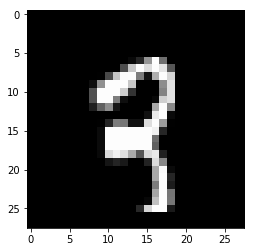

[ 25624 ]  Five


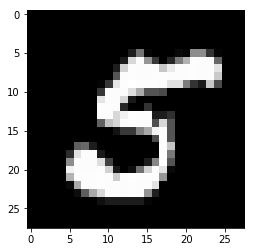

[ 18711 ]  Nine


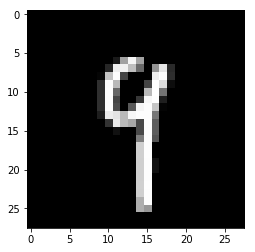

[ 15828 ]  Six


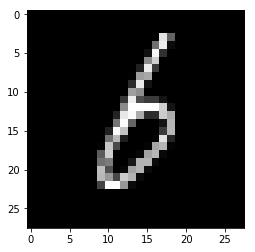

[ 13906 ]  Seven


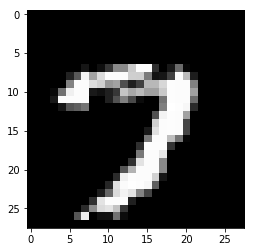

[ 16659 ]  Six


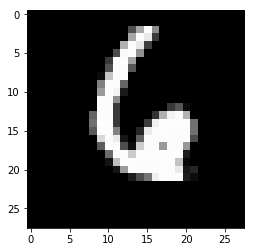

[ 29072 ]  Three


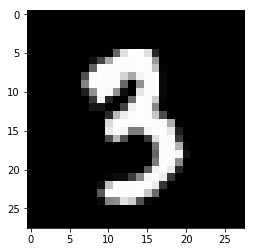

[ 21928 ]  Six


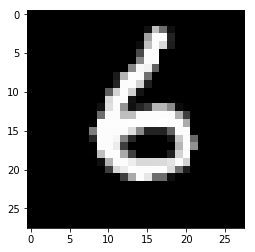

[ 13981 ]  Eight


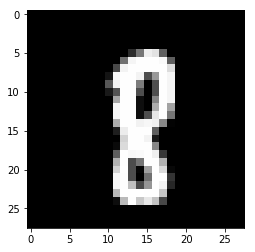

In [43]:
for i in range(0, 9):
    i_rand = randint(0, X.shape[0])

    print("[", i_rand, "] ", classes[Y[i_rand]])
    two_d = (X.iloc[i_rand].values.reshape(28, 28))
    plt.imshow(two_d, cmap='gray')
    plt.show()

In [44]:
X_train_plus_valid, X_test, y_train_plus_valid, y_test \
    = train_test_split(X, Y, random_state=0, \
                                    train_size = 0.7)

X_train, X_valid, y_train, y_valid \
    = train_test_split(X_train_plus_valid, \
                                        y_train_plus_valid, \
                                        random_state=0, \
                                        train_size = 0.5/0.7)

C:\Users\reach\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [27]:
from sklearn import tree

In [45]:
my_tree = tree.DecisionTreeClassifier(criterion="entropy")
my_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [29]:
from sklearn import metrics

In [30]:
y_pred = my_tree.predict(X_train)

# Print performance details
accuracy = metrics.accuracy_score(y_train, y_pred) # , normalize=True, sample_weight=None
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_train, y_pred))

# Print confusion matrix
# print(metrics.confusion_matrix(y_train, y_pred))

# Print nicer homemade confusion matrix
print("Confusion Matrix")
pd.crosstab(np.array(y_train), y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 1.0
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      2078
          1       1.00      1.00      1.00      2300
          2       1.00      1.00      1.00      2072
          3       1.00      1.00      1.00      2139
          4       1.00      1.00      1.00      2050
          5       1.00      1.00      1.00      1913
          6       1.00      1.00      1.00      2072
          7       1.00      1.00      1.00      2228
          8       1.00      1.00      1.00      2036
          9       1.00      1.00      1.00      2111

avg / total       1.00      1.00      1.00     20999

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,2078,0,0,0,0,0,0,0,0,0,2078
1,0,2300,0,0,0,0,0,0,0,0,2300
2,0,0,2072,0,0,0,0,0,0,0,2072
3,0,0,0,2139,0,0,0,0,0,0,2139
4,0,0,0,0,2050,0,0,0,0,0,2050
5,0,0,0,0,0,1913,0,0,0,0,1913
6,0,0,0,0,0,0,2072,0,0,0,2072
7,0,0,0,0,0,0,0,2228,0,0,2228
8,0,0,0,0,0,0,0,0,2036,0,2036


In [47]:
model_test_accuracy_comparisons = dict()
model_valid_accuracy_comparisons = dict()
model_tuned_params_list = dict()

In [48]:
# Make a set of predictions for the test data
y_pred = my_tree.predict(X_valid)

# Print performance details
accuracy = metrics.accuracy_score(y_valid, y_pred) # , normalize=True, sample_weight=None
model_valid_accuracy_comparisons["Simple Tree"] = accuracy
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_valid, y_pred))

# Print confusion matrix
# print(metrics.confusion_matrix(y_valid, y_pred))

# Print nicer confusion matrix
print("Confusion Matrix")
pd.crosstab(np.array(y_valid), y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 0.8445238095238096
             precision    recall  f1-score   support

          0       0.90      0.93      0.91       811
          1       0.94      0.94      0.94       955
          2       0.81      0.78      0.79       829
          3       0.82      0.79      0.80       914
          4       0.83      0.82      0.83       786
          5       0.78      0.74      0.76       763
          6       0.87      0.89      0.88       822
          7       0.89      0.91      0.90       839
          8       0.80      0.79      0.80       823
          9       0.79      0.83      0.81       858

avg / total       0.84      0.84      0.84      8400

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,751,1,10,1,3,10,21,1,7,6,811
1,1,901,14,10,4,2,1,4,13,5,955
2,12,6,645,26,27,17,21,28,30,17,829
3,16,12,25,720,9,59,9,8,32,24,914
4,6,5,13,7,645,10,19,10,12,59,786
5,17,5,16,66,11,568,17,4,32,27,763
6,12,0,24,2,14,13,730,3,18,6,822
7,2,9,12,8,10,3,0,765,7,23,839
8,10,15,26,18,11,38,16,14,653,22,823


In [49]:
my_model = ensemble.RandomForestClassifier(n_estimators=300, \
                                           max_features = 3,\
                                           min_samples_split=200)
my_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=200,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [50]:
# Make a set of predictions for the test data
y_pred = my_model.predict(X_valid)

# Print performance details
print(metrics.classification_report(y_valid, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(y_valid, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

             precision    recall  f1-score   support

          0       0.93      0.98      0.95       811
          1       0.95      0.98      0.97       955
          2       0.92      0.89      0.90       829
          3       0.85      0.89      0.87       914
          4       0.92      0.90      0.91       786
          5       0.95      0.81      0.88       763
          6       0.92      0.96      0.94       822
          7       0.90      0.94      0.92       839
          8       0.92      0.87      0.89       823
          9       0.87      0.88      0.87       858

avg / total       0.91      0.91      0.91      8400

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,792,0,0,1,0,2,9,0,7,0,811
1,0,940,3,2,0,0,1,3,5,1,955
2,11,4,736,9,18,2,17,16,14,2,829
3,5,10,27,813,0,4,4,15,20,16,914
4,1,4,4,0,710,0,16,4,3,44,786
5,17,4,6,80,5,617,16,2,6,10,763
6,8,5,2,0,2,11,793,0,1,0,822
7,5,7,11,1,4,0,0,785,1,25,839
8,7,10,10,36,11,10,2,5,714,18,823
